<a href="https://www.kaggle.com/code/ahmadibraheeem/titanic-predictive-model?scriptVersionId=117142636" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading Train Data

In [2]:
titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Feature Corrolation Heatmap

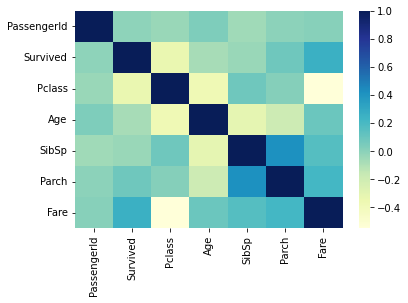

In [5]:
import seaborn as sns
sns.heatmap(titanic_data.corr(),cmap="YlGnBu")
plt.show()

## Creating Stratified Dataset

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit
split_data = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in split_data.split(titanic_data,titanic_data[["Survived","Pclass","Sex"]]):
    strat_train_set = titanic_data.loc[train_index]
    strat_test_set = titanic_data.loc[test_index]

In [7]:
strat_test_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
76,77,0,3,"Staneff, Mr. Ivan",male,NaN,0,0,349208,7.8958,NaN,S
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C68,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,B28,NaN
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
372,373,0,3,"Beavan, Mr. William Thomas",male,19.0,0,0,323951,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
535,536,1,2,"Hart, Miss. Eva Miriam",female,7.0,0,2,F.C.C. 13529,26.2500,NaN,S
555,556,0,1,"Wright, Mr. George",male,62.0,0,0,113807,26.5500,NaN,S
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S


### Comparing the destribution of "Survived","Pclass" in the Stratified 'train' and 'test' dataset

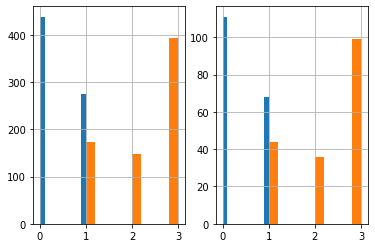

In [8]:
plt.subplot(1,2,1)
strat_train_set["Survived"].hist()
strat_train_set["Pclass"].hist()

plt.subplot(1,2,2)

strat_test_set["Survived"].hist()
strat_test_set["Pclass"].hist()

plt.show()

## Data Validation

In [9]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 549 to 167
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          574 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        157 non-null    object 
 11  Embarked     711 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Imputing missing "Age" values

In [10]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer (BaseEstimator, TransformerMixin):
    def fit(self,X,y=None):
        return self
    def transform (self,X):
        imputer= SimpleImputer(strategy="mean")
        X['Age']= imputer.fit_transform(X[['Age']])
        return X

## Transforming "Embarked" and "Sex" Coulumns

In [11]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder (BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform (self,X):
        
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[["Embarked"]]).toarray()
        coulmn_names = ["C","S","Q","N"]
        
        for i in range(len(matrix.T)):
            X[coulmn_names[i]]= matrix.T[i]
            
        matrix = encoder.fit_transform(X[["Sex"]]).toarray()
        coulmn_names = ["Male","Female"]
        
        for i in range(len(matrix.T)):
            X[coulmn_names[i]]= matrix.T[i]
            
        return X

## Dropping irrelevant features

In [12]:
class FeatureDropper (BaseEstimator, TransformerMixin):
    
    def fit(self,X,y=None):
        return self
    
    def transform (self,X):
        return X.drop(["Embarked","Name","Ticket","Cabin","Sex","N"], axis=1, errors="ignore")

## Creating the pipeline

In [13]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("ageimputer",AgeImputer()),
                     ("featureencoder", FeatureEncoder()),
                     ("featuredropper",FeatureDropper())])

## Transforming Stratified dataset

In [14]:
#strat_train_set
strat_train_set = pipeline.fit_transform(strat_train_set)
#help(pipeline.fit_transform([strat_train_set]))

## Scaling Strat dataset

In [15]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop(['Survived'],axis=1)
y = strat_train_set['Survived']
scaler = StandardScaler()
X_Data = scaler.fit_transform(X)
y_Data = y.to_numpy()

In [16]:
X_Data

array([[ 0.41814232, -0.37019624, -1.68299458, ...,  0.63805535,
        -0.73561236,  0.73561236],
       [-0.28409522, -1.56828591, -0.37543184, ..., -1.56726216,
        -0.73561236,  0.73561236],
       [-1.70033964, -0.37019624, -1.22150185, ..., -1.56726216,
         1.35941164, -1.35941164],
       ...,
       [-0.68425292, -1.56828591,  2.16277818, ...,  0.63805535,
         1.35941164, -1.35941164],
       [-1.20602718, -0.37019624, -0.52926275, ..., -1.56726216,
        -0.73561236,  0.73561236],
       [-1.08048751,  0.82789342,  1.16287726, ...,  0.63805535,
         1.35941164, -1.35941164]])

# Training strat Dataset

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [{"n_estimators":[100,300,500,700],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
grid_search = GridSearchCV(clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Data,y_Data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 300, 500, 700]}],
             return_train_score=True, scoring='accuracy')

## Identifying Best Estimator

In [18]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5)

## Accuracy Score

In [19]:
final_clf.score(X_Data,y_Data)

0.8539325842696629

# Working on the Full Dataset

## Scaling Full Dataset

In [20]:
#Scaling Production Data

from sklearn.preprocessing import StandardScaler

prod_clf = pipeline.fit_transform(titanic_data)

X = prod_clf.drop(['Survived'],axis=1)
y = prod_clf['Survived']
scaler = StandardScaler()
X_Prod_Data = scaler.fit_transform(X)
y_Prod_Data = y.to_numpy()

## The Production Classifier

In [21]:
#The Production Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

prod_clf = RandomForestClassifier()
param_grid = [{"n_estimators":[100,300,500,700],"max_depth":[None,5,10],"min_samples_split":[2,3,4]}]
grid_search = GridSearchCV(prod_clf,param_grid,cv=3,scoring="accuracy",return_train_score=True)
grid_search.fit(X_Prod_Data,y_Prod_Data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [100, 300, 500, 700]}],
             return_train_score=True, scoring='accuracy')

## Identifying Best Estimator

In [22]:
prod_clf = grid_search.best_estimator_
prod_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

# Final Accuracy Score

In [23]:
prod_clf.score(X_Prod_Data,y_Prod_Data)

0.8462401795735129

# Reading and Scaling Test Data

In [24]:
titanic_test_data = pd.read_csv('/kaggle/input/titanic/test.csv')
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data = final_test_data.fillna(method="ffill")
scaler = StandardScaler()
Prod_test_data = scaler.fit_transform(final_test_data)

## Predicting Test Data

In [25]:
predictions= prod_clf.predict(Prod_test_data)
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## Outputting predictions file

In [26]:
#Creating Final DataFrame then exporting the output CSV file

final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv("predictions.csv", index=False)